In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

import requests
import json

In [2]:
# Data source:  https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if
path1 = "CSV/Traffic_Crashes_-_Crashes.csv"
# Data source:  https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3
path2 = "CSV/Traffic_Crashes_-_Vehicles.csv"
# Data source:  https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d
path3 = "CSV/Traffic_Crashes_-_People.csv"

In [73]:
# Read file into people_data dataframe.  Set dtype of probematic columns due to dtypewarning message:
people_data_df = pd.read_csv(path3, dtype={'EMS_RUN_NO':'str', 'PEDPEDAL_ACTION':'str', 'PEDPEDAL_VISIBILITY':'str', 'PEDPEDAL_LOCATION':'str', 'CELL_PHONE_USE' : 'str'}  )

In [76]:
# Filter dataframe to include only years 2018 - 2022 for consistency
people_data_df = people_data_df[people_data_df['CRASH_DATE'].str.contains("(?:/2018|/2019|/2020|/2021|/2022)")]
people_data_df

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
12,O848601,DRIVER,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,JD162399,805348.0,02/23/2020 06:15:00 PM,NaN,CHICAGO,IL,60625,F,34.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
13,O877654,DRIVER,e9146986f4b0884d00ff3a54da5249263b4b36c15d01ce...,JD220792,832624.0,04/30/2020 03:05:00 PM,NaN,CHICAGO,IL,60620,M,53.0,IL,B,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,REFUSED,NaN,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
14,O879085,DRIVER,f15ccbd94a8e29ce8424882ce93061d4e1d0deb214acfe...,JD223542,833984.0,05/03/2020 10:30:00 PM,NaN,CALUMENT CITY,NaN,NaN,M,65.0,IL,D,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516652,O1511131,DRIVER,8641a5378e6dd19987d6dcf6f8ead5f1731740b21d53b1...,JG139707,1436706.0,01/30/2022 04:40:00 PM,NaN,GREENSBORO,NC,27410,F,NaN,XX,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1516653,O1511132,DRIVER,8641a5378e6dd19987d6dcf6f8ead5f1731740b21d53b1...,JG139707,1436714.0,01/30/2022 04:40:00 PM,NaN,CHICAGO,IL,60626,F,NaN,IL,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1516865,P333999,PASSENGER,69870c969e4f8b3462205cd8bcb247363d65a09922c701...,JF518264,1436631.0,12/21/2022 08:09:00 AM,3.0,CHICAGO,IL,60636,M,12.0,NaN,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1516866,P334000,PASSENGER,69870c969e4f8b3462205cd8bcb247363d65a09922c701...,JF518264,1436631.0,12/21/2022 08:09:00 AM,10.0,CHICAGO,IL,60636,F,9.0,NaN,NaN,SAFETY BELT USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# Break down vehicle data by year and export files to CSV:
# years = ["2018", "2019", "2020", "2021", "2022"]
# for year in years:
#     tmp_filtered_df = people_data_df[people_data_df["CRASH_DATE"].str.contains(f"/{year} ")]
#     tmp_filtered_df.to_csv(f'CSV/Traffic_Crashes_-_People-{year}.csv')

In [81]:
people_data_df.keys()

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [82]:
# Make sense of the data by printing values for each column in the table, sorted by how often the value appears in the column:
# for key in people_data_df.keys():
#     print(f"key = {key}")
#     output = people_data_df[key].value_counts().nlargest(10)
#     print(f"output = \n{output}\n")

In [87]:
# Drop unneeded columns
people_data_df = people_data_df.loc[:, ['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'CRASH_DATE', 'CITY', 'STATE', 'ZIPCODE', 
                                    'SEX', 'AGE', 'DRIVERS_LICENSE_STATE', 'INJURY_CLASSIFICATION', 'DRIVER_VISION', 
                                    'PHYSICAL_CONDITION', 'BAC_RESULT', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']]
people_data_df

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,INJURY_CLASSIFICATION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,CHICAGO,IL,60651,M,25.0,IL,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,CHICAGO,IL,60620,M,37.0,IL,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL,TEST NOT OFFERED,NaN,NaN
12,O848601,DRIVER,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,02/23/2020 06:15:00 PM,CHICAGO,IL,60625,F,34.0,IL,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL,TEST NOT OFFERED,NaN,NaN
13,O877654,DRIVER,e9146986f4b0884d00ff3a54da5249263b4b36c15d01ce...,04/30/2020 03:05:00 PM,CHICAGO,IL,60620,M,53.0,IL,NO INDICATION OF INJURY,UNKNOWN,NORMAL,TEST NOT OFFERED,NaN,NaN
14,O879085,DRIVER,f15ccbd94a8e29ce8424882ce93061d4e1d0deb214acfe...,05/03/2020 10:30:00 PM,CALUMENT CITY,NaN,NaN,M,65.0,IL,NO INDICATION OF INJURY,UNKNOWN,NORMAL,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516652,O1511131,DRIVER,8641a5378e6dd19987d6dcf6f8ead5f1731740b21d53b1...,01/30/2022 04:40:00 PM,GREENSBORO,NC,27410,F,NaN,XX,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,TEST NOT OFFERED,NaN,NaN
1516653,O1511132,DRIVER,8641a5378e6dd19987d6dcf6f8ead5f1731740b21d53b1...,01/30/2022 04:40:00 PM,CHICAGO,IL,60626,F,NaN,IL,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,TEST NOT OFFERED,NaN,NaN
1516865,P333999,PASSENGER,69870c969e4f8b3462205cd8bcb247363d65a09922c701...,12/21/2022 08:09:00 AM,CHICAGO,IL,60636,M,12.0,NaN,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN
1516866,P334000,PASSENGER,69870c969e4f8b3462205cd8bcb247363d65a09922c701...,12/21/2022 08:09:00 AM,CHICAGO,IL,60636,F,9.0,NaN,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN


In [89]:
people_data_df = people_data_df.rename(columns ={"PERSON_ID" : "Person ID",
                                               "PERSON_TYPE" : "Person Type",
                                               "CRASH_RECORD_ID" : "Crash Record ID",
                                               "CRASH_DATE": "Crash Date",
                                               "CITY" : "Drivers City",
                                               "STATE": "Drivers State",
                                               "ZIPCODE" : "Drivers Zipcode",
                                               "SEX" : "Sex",
                                               "AGE": "Age", 
                                               "DRIVERS_LICENSE_STATE" : "Drivers License State", 
                                               "DRIVER_VISION": "Driver Vision",
                                               "PHYSICAL_CONDITION" : "Driver Physical Condition", 
                                               "BAC_RESULT" : "BAC Result", 
                                               "BAC_RESULT VALUE": "BAC Result Value", 
                                               "CELL_PHONE_USE": "Cell Phone Use"
                                              })
people_data_df

,Person ID,Person Type,Crash Record ID,Crash Date,Drivers City,Drivers State,Drivers Zipcode,Sex,Age,Drivers License State,INJURY_CLASSIFICATION,Driver Vision,Driver Physical Condition,BAC Result,BAC Result Value,Cell Phone Use
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,CHICAGO,IL,60651,M,25.0,IL,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,CHICAGO,IL,60620,M,37.0,IL,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL,TEST NOT OFFERED,NaN,NaN
12,O848601,DRIVER,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,02/23/2020 06:15:00 PM,CHICAGO,IL,60625,F,34.0,IL,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL,TEST NOT OFFERED,NaN,NaN
13,O877654,DRIVER,e9146986f4b0884d00ff3a54da5249263b4b36c15d01ce...,04/30/2020 03:05:00 PM,CHICAGO,IL,60620,M,53.0,IL,NO INDICATION OF INJURY,UNKNOWN,NORMAL,TEST NOT OFFERED,NaN,NaN
14,O879085,DRIVER,f15ccbd94a8e29ce8424882ce93061d4e1d0deb214acfe...,05/03/2020 10:30:00 PM,CALUMENT CITY,NaN,NaN,M,65.0,IL,NO INDICATION OF INJURY,UNKNOWN,NORMAL,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516652,O1511131,DRIVER,8641a5378e6dd19987d6dcf6f8ead5f1731740b21d53b1...,01/30/2022 04:40:00 PM,GREENSBORO,NC,27410,F,NaN,XX,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,TEST NOT OFFERED,NaN,NaN
1516653,O1511132,DRIVER,8641a5378e6dd19987d6dcf6f8ead5f1731740b21d53b1...,01/30/2022 04:40:00 PM,CHICAGO,IL,60626,F,NaN,IL,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,TEST NOT OFFERED,NaN,NaN
1516865,P333999,PASSENGER,69870c969e4f8b3462205cd8bcb247363d65a09922c701...,12/21/2022 08:09:00 AM,CHICAGO,IL,60636,M,12.0,NaN,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN
1516866,P334000,PASSENGER,69870c969e4f8b3462205cd8bcb247363d65a09922c701...,12/21/2022 08:09:00 AM,CHICAGO,IL,60636,F,9.0,NaN,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN


In [86]:
# Read in crash data from CSV file:
crash_data = pd.read_csv(path1)
crash_data

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",03/25/2019 03:17:00 PM,IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,121.0,NaN,NaN,NaN,NaN,NaN,NaN,2,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",09/05/2018 09:00:00 AM,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,1712.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/15/2022 12:50:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,1123.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,NaN,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",09/01/2022 11:30:00 AM,DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,3939,W,79TH ST,834.0,Y,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,11,2,8,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/20/2022 11:00:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,1811.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693090,19d66ccf73917206f2e91092e8976a300b1f84daa8833e...,JF485903,NaN,11/24/2022 12:01:00 AM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,Y,NaN,Y,"$501 - $1,500",11/24/2022 12:01:00 AM,HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),UNABLE TO DETERMINE,3201,W,FILLMORE ST,1134.0,Y,NaN,NaN,NaN,NaN,NaN,4,NO INDICATION OF INJURY,0

In [94]:
# See what columns are present:
crash_data.keys()

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [95]:
# Drop unnecessary columns
crash_data_df = crash_data.loc[:, ["CRASH_RECORD_ID", "CRASH_DATE", "POSTED_SPEED_LIMIT", "TRAFFIC_CONTROL_DEVICE", 
                                   "DEVICE_CONDITION", "WEATHER_CONDITION", "LIGHTING_CONDITION",
                                   "FIRST_CRASH_TYPE" ,"TRAFFICWAY_TYPE", "LANE_CNT", "ROADWAY_SURFACE_COND",
                                   "ROAD_DEFECT", "CRASH_TYPE", "DAMAGE", "PRIM_CONTRIBUTORY_CAUSE", "SEC_CONTRIBUTORY_CAUSE",
                                   "STREET_NO","STREET_DIRECTION", "STREET_NAME", "MOST_SEVERE_INJURY", 
                                   "INJURIES_TOTAL", "INJURIES_FATAL", "INJURIES_INCAPACITATING", 
                                   "INJURIES_NON_INCAPACITATING", 
                                   'INJURIES_NO_INDICATION', 
                                   'CRASH_DAY_OF_WEEK', 'LATITUDE', 'LONGITUDE', 'LOCATION']]
crash_data_df

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_NO_INDICATION,CRASH_DAY_OF_WEEK,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,3939,W,79TH ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,3.0,2,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693090,19d66ccf73917206f2e91092e8976a300b1f84daa8833e...,11/24/2022 12:01:00 AM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,OTHER,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),UNABLE TO DETERMINE,3201,W,FILLMORE ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,5,41.868114,-87.705847,POINT (-87.705846742577 41.868113701907)
693091,58836410941fb22412eaeaf1e8111f5d3c0ab0c68fd155...,11/24/2022 03:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,UNABLE TO DETERMINE,1730,W,EDMAIRE ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,5,41.686263,-87.664858,POINT (-87.664858007912 41.686263191946)
693092,8588fb5bf485485db492c6d13fc5d2ae8f722ef423e7e1...,11/24/2022 01:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,Y-INTERSECTION,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,5679,N,RIDGE AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,5,41.985267,-87.662517,POINT (-87.662516804053 41.985266769831)
693093,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,11/24/2022 06:47:00 AM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,50,W,HARRISON ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,

In [96]:
# Rename columns for improved readability:
crash_data_df = crash_data_df.rename(columns ={"CRASH_DATE" : "Crash Date",
                                               "CRASH_RECORD_ID" : "Crash Record ID",
                                               "POSTED_SPEED_LIMIT" : "Posted Speed Limit",
                                               "TRAFFIC_CONTROL_DEVICE": "Traffic Control Device",
                                               "DEVICE_CONDITION" : "Device Condition",
                                               "WEATHER_CONDITION": "Weather Condition",
                                               "LIGHTING_CONDITION" : "Lighting Condition",
                                               "FIRST_CRASH_TYPE" : "Crash Type",
                                               "TRAFFICWAY_TYPE": "Street Type", 
                                               "LANE_CNT" : "Number of Lanes", 
                                               "ROADWAY_SURFACE_COND": "Roadway Condition",
                                               "ROAD_DEFECT" : "Road Defect", 
                                               "CRASH_TYPE" : "Severity", 
                                               "DAMAGE": "Damages", 
                                               "PRIM_CONTRIBUTORY_CAUSE": "Primary Contributory Cause", 
                                               "SEC_CONTRIBUTORY_CAUSE" : "Secondary Contributory Cause",
                                               "STREET_NO" : "Street Number",
                                               "STREET_DIRECTION" : "Street Direction", 
                                               "STREET_NAME": "Street Name", 
                                               "MOST_SEVERE_INJURY": "Injury Type", 
                                               "INJURIES_TOTAL": "Total Injuries", 
                                               "INJURIES_FATAL" : "Fatal Injuries", 
                                               "INJURIES_INCAPACITATING" : "Severe Injuries", 
                                               "INJURIES_NON_INCAPACITATING" : "Minor Injuries", 
                                               "INJURIES_NO_INDICATION" : "No Injuries Recorded", 
                                               "CRASH_DAY_OF_WEEK": "Day of Week",
                                               "LATITUDE": "Latitude", 
                                               "LONGITUDE": "Longitude",
                                               "LOCATION" : "Location",
                                              })
crash_data_df

,Crash Record ID,Crash Date,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,3939,W,79TH ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,3.0,2,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693090,19d66ccf73917206f2e91092e8976a300b1f84daa8833e...,11/24/2022 12:01:00 AM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,OTHER,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),UNABLE TO DETERMINE,3201,W,FILLMORE ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,5,41.868114,-87.705847,POINT (-87.705846742577 41.868113701907)
693091,58836410941fb22412eaeaf1e8111f5d3c0ab0c68fd155...,11/24/2022 03:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,UNABLE TO DETERMINE,1730,W,EDMAIRE ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,5,41.686263,-87.664858,POINT (-87.664858007912 41.686263191946)
693092,8588fb5bf485485db492c6d13fc5d2ae8f722ef423e7e1...,11/24/2022 01:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,Y-INTERSECTION,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,5679,N,RIDGE AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,5,41.985267,-87.662517,POINT (-87.662516804053 41.985266769831)
693093,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,11/24/2022 06:47:00 AM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,50,W,HARRISON ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,5,41.874644,-87.629649,POINT (

In [93]:
# Explore the data by looking for the most common values in each column:
# for key in crash_data_df.keys():
#     print(f"key = {key}")
#     output = crash_data_df[key].value_counts().nlargest(10)
#     print(f"output = \n{output}\n")

In [20]:
# Break huge file down by years:
# years = ["2018", "2019", "2020", "2021", "2022"]
# for year in years:
#     tmp_filtered_df = crash_data_df[crash_data_df["Crash Date"].str.contains(f"/{year} ")]
#     tmp_filtered_df.shape
#     tmp_filtered_df.to_csv(f'CSV/Traffic_Crashes_-_Crashes-{year}.csv')


In [101]:
# Pull in data regarding the vehicles involved in crashes:
# 
# Adjusting to remove following error:  DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.  Specify dtype option on import or set low_memory=False.

vehicle_data = pd.read_csv(path2, dtype={
    'FIRE_I':'str', 'EXCEED_SPEED_LIMIT_I':'str', 'USDOT_NO':'str', 'CCMC_NO':'str', 'ILCC_NO':'str', 'GVWR':'str', 
    'HAZMAT_PLACARDS_I':'str', 'HAZMAT_NAME':'str', 'UN_NO':'str', 'HAZMAT_REPORT_NO':'str', 'MCS_REPORT_NO':'str', 
    'IDOT_PERMIT_NO':'str', 'WIDE_LOAD_I':'str', 'TRAILER2_WIDTH':'str', 'HAZMAT_CLASS':'str'} )
vehicle_data
# Sunday is 1

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,TOWED_I,FIRE_I,OCCUPANT_CNT,EXCEED_SPEED_LIMIT_I,TOWED_BY,TOWED_TO,AREA_00_I,AREA_01_I,AREA_02_I,AREA_03_I,AREA_04_I,AREA_05_I,AREA_06_I,AREA_07_I,AREA_08_I,AREA_09_I,AREA_10_I,AREA_11_I,AREA_12_I,AREA_99_I,FIRST_CONTACT_POINT,CMV_ID,USDOT_NO,CCMC_NO,ILCC_NO,COMMERCIAL_SRC,GVWR,CARRIER_NAME,CARRIER_STATE,CARRIER_CITY,HAZMAT_PLACARDS_I,HAZMAT_NAME,UN_NO,HAZMAT_PRESENT_I,HAZMAT_REPORT_I,HAZMAT_REPORT_NO,MCS_REPORT_I,MCS_REPORT_NO,HAZMAT_VIO_CAUSE_CRASH_I,MCS_VIO_CAUSE_CRASH_I,IDOT_PERMIT_NO,WIDE_LOAD_I,TRAILER1_WIDTH,TRAILER2_WIDTH,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,YARIS,IL,2010.0,NONE,UNKNOWN/NA,PERSONAL,N,PARKED,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,ROOF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),SIERRA,IL,2008.0,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,N,PARKED,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,ROOF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,ENCORE,IL,NaN,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT-RIGHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412211,1508506,6c26e8407561884de71818e40d831baa8933a3f1d51081...,JG135050,01/21/2023 12:59:00 PM,1,DRIVER,NaN,1434178.0,NaN,SCION,TC,IL,2008.0,NONE,PASSENGER,PERSONAL,N,CHANGING LANES,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,TOTAL (ALL AREAS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1412212,1508507,6c26e8407561884de71818e40d831baa8933a3f1d51081...,JG135050,01/21/2023 12:59:00 PM,2,DRIVER,NaN,1434196.0,NaN,JEEP,CHEROKEE,IL,2018.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REAR-RIGHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [102]:
vehicle_data.keys()

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       '

In [107]:
vehicle_data_df = vehicle_data.loc[:,['CRASH_RECORD_ID','CRASH_DATE',
                                      'NUM_PASSENGERS','MAKE','MODEL',
                                      'VEHICLE_YEAR','VEHICLE_TYPE','VEHICLE_USE','TRAVEL_DIRECTION',
                                      'MANEUVER','TOWED_I','FIRE_I','OCCUPANT_CNT','EXCEED_SPEED_LIMIT_I']]
vehicle_data_df = vehicle_data_df.rename(columns={'CRASH_RECORD_ID':"Crash Record ID",
                                                    'CRASH_DATE':"Crash Date",
                                                    'NUM_PASSENGERS':"Number of Passengers",
                                                    'MAKE':"Make",
                                                    'MODEL':"Model",
                                                    'VEHICLE_YEAR':"Vehicle Year",
                                                    'VEHICLE_TYPE':"Vehicle Type",
                                                    'VEHICLE_USE':"Vehicle Use",
                                                    'TRAVEL_DIRECTION':"Travel Direction",
                                                    'MANEUVER':"Maneuver",
                                                    'TOWED_I':"Vehicle Towed",
                                                    'FIRE_I':"Vehicle Fire",
                                                    'OCCUPANT_CNT':"Number of Occupants",
                                                    'EXCEED_SPEED_LIMIT_I':"Exceeded Speed Limit",
                                                 })
vehicle_data_df

,Crash Record ID,Crash Date,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Vehicle Use,Travel Direction,Maneuver,Vehicle Towed,Vehicle Fire,Number of Occupants,Exceeded Speed Limit
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,01/22/2020 06:25:00 AM,NaN,INFINITI,UNKNOWN,2017.0,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,NaN,HONDA,CIVIC,2016.0,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN
2,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,NaN,TOYOTA,YARIS,2010.0,UNKNOWN/NA,PERSONAL,N,PARKED,NaN,NaN,0.0,NaN
3,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,NaN,GENERAL MOTORS CORPORATION (GMC),SIERRA,2008.0,UNKNOWN/NA,UNKNOWN/NA,N,PARKED,NaN,NaN,0.0,NaN
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,NaN,BUICK,ENCORE,NaN,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412211,6c26e8407561884de71818e40d831baa8933a3f1d51081...,01/21/2023 12:59:00 PM,NaN,SCION,TC,2008.0,PASSENGER,PERSONAL,N,CHANGING LANES,NaN,NaN,1.0,NaN
1412212,6c26e8407561884de71818e40d831baa8933a3f1d51081...,01/21/2023 12:59:00 PM,NaN,JEEP,CHEROKEE,2018.0,SPORT UTILITY VEHICLE (SUV),PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN
1412213,03a2dc75ecec7d98ff335864b6d6e40a68e179a972e31c...,01/21/2023 09:00:00 PM,NaN,DODGE,DART,2016.0,PASSENGER,UNKNOWN/NA,N,STRAIGHT AHEAD,Y,NaN,1.0,NaN
1412214,03a2dc75ecec7d98ff335864b6d6e40a68e179a972e31c...,01/21/2023 09:00:00 PM,2.0,TOYOTA,RAV4,2017.0,PASSENGER,TAXI/FOR HIRE,N,SLOW/STOP IN TRAFFIC,NaN,NaN,3.0,NaN


In [109]:
# Getting to know the data:
# for key in vehicle_data_df.keys():
#     print(f"key = {key}")
#     output = vehicle_data_df[key].value_counts().nlargest(10)
#     print(f"output = \n{output}\n")

In [25]:
# Break down vehicle data by year:
# years = ["2018", "2019", "2020", "2021", "2022"]
# for year in years:
#     tmp_filtered_df = vehicle_data_df[vehicle_data_df["Crash Date"].str.contains(f"/{year} ")]
#     tmp_filtered_df.to_csv(f'CSV/Traffic_Crashes_-_Vehicles.-{year}.csv')

In [113]:
# Merge vehicle data with crash data:
chicago_df = pd.merge(crash_data_df, vehicle_data_df, on="Crash Record ID")
pd.options.display.max_columns = 500
chicago_df

,Crash Record ID,Crash Date_x,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Crash Date_y,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Vehicle Use,Travel Direction,Maneuver,Vehicle Towed,Vehicle Fire,Number of Occupants,Exceeded Speed Limit
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),03/25/2019 02:43:00 PM,1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,RIDESHARE SERVICE,W,TURNING LEFT,Y,NaN,2.0,NaN
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),03/25/2019 02:43:00 PM,NaN,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,NaN
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),09/05/2018 08:40:00 AM,NaN,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),09/05/2018 08:40:00 AM,NaN,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,PERSONAL,SE,STRAIGHT AHEAD,NaN,NaN,1.0,NaN
4,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761),07/15/2022 12:45:00 AM,NaN,HYUNDAI,OTHER (EXPLAIN IN NARRATIVE),NaN,UNKNOWN/NA,UNKNOWN/NA,W,UNKNOWN/NA,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412209,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,11/24/2022 06:47:00 AM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,50,W,HARRISON ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,5,41.874644,-87.629649,POINT (-87.629648503841 41.874644283241),11/24/2022 06:47:00 AM,NaN,UNKNOWN,OTHER (EXPLAIN IN NARRATIVE),NaN,UNKNOWN/NA,UNKNOWN/NA,UNKNOWN,UNKNOWN/NA,NaN,NaN,1.0,NaN
1412210,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,11/24/2022 06:47:00 AM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR 

In [114]:
chicago_df = chicago_df.drop(columns=["Crash Date_y"])

In [115]:
chicago_df = chicago_df.rename(columns={ "Crash Date_x" : "Crash Date"})

In [116]:
newcol = []
newcol2 = []
for date in chicago_df["Crash Date"]:
    newcol.append(date.split()[0])
    newcol2.append((date.split()[1],date.split()[2]))
chicago_df["Date"] = newcol
chicago_df["Time"] = newcol2
chicago_df

,Crash Record ID,Crash Date,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Vehicle Use,Travel Direction,Maneuver,Vehicle Towed,Vehicle Fire,Number of Occupants,Exceeded Speed Limit,Date,Time
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,RIDESHARE SERVICE,W,TURNING LEFT,Y,NaN,2.0,NaN,03/25/2019,"(02:43:00, PM)"
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),NaN,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,03/25/2019,"(02:43:00, PM)"
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),NaN,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,09/05/2018,"(08:40:00, AM)"
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),NaN,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,PERSONAL,SE,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,09/05/2018,"(08:40:00, AM)"
4,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761),NaN,HYUNDAI,OTHER (EXPLAIN IN NARRATIVE),NaN,UNKNOWN/NA,UNKNOWN/NA,W,UNKNOWN/NA,NaN,NaN,1.0,NaN,07/15/2022,"(12:45:00, AM)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412209,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,11/24/2022 06:47:00 AM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,50,W,HARRISON ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,5,41.874644,-87.629649,POINT (-87.629648503841 41.874644283241),NaN,UNKNOWN,OTHER (EXPLAIN IN NARRATIVE),NaN,UNKNOWN/NA,UNKNOWN/NA,UNKNOWN,UNKNOWN/NA,NaN,NaN,1.0,NaN,11/24/2022,"(06:47:00, AM)"
1412210,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,11/24/2022 06:47:00 AM,10,NO CONTROLS,NO CONTROLS

In [117]:
chicago_df.columns

Index(['Crash Record ID', 'Crash Date', 'Posted Speed Limit',
       'Traffic Control Device', 'Device Condition', 'Weather Condition',
       'Lighting Condition', 'Crash Type', 'Street Type', 'Number of Lanes',
       'Roadway Condition', 'Road Defect', 'Severity', 'Damages',
       'Primary Contributory Cause', 'Secondary Contributory Cause',
       'Street Number', 'Street Direction', 'Street Name', 'Injury Type',
       'Total Injuries', 'Fatal Injuries', 'Severe Injuries', 'Minor Injuries',
       'No Injuries Recorded', 'Day of Week', 'Latitude', 'Longitude',
       'Location', 'Number of Passengers', 'Make', 'Model', 'Vehicle Year',
       'Vehicle Type', 'Vehicle Use', 'Travel Direction', 'Maneuver',
       'Vehicle Towed', 'Vehicle Fire', 'Number of Occupants',
       'Exceeded Speed Limit', 'Date', 'Time'],
      dtype='object')

In [118]:
replace_df = chicago_df
replace_df["Number of Passengers"] = replace_df["Number of Passengers"].fillna(0)
replace_df["Exceeded Speed Limit"] = replace_df["Exceeded Speed Limit"].fillna("UNKNOWN")
replace_df["Vehicle Year"] = replace_df["Vehicle Year"].fillna("UNKNOWN")
replace_df["Number of Occupants"] = replace_df["Number of Occupants"].fillna(0)
replace_df = replace_df.replace({"Day of Week":{1:"Sunday",2:"Monday",3:"Tuesday",4:"Wednesday",5:"Thursday",6:"Friday",7:"Saturday"}})
replace_df = replace_df.drop(columns=["Crash Date"])
replace_df

,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Vehicle Use,Travel Direction,Maneuver,Vehicle Towed,Vehicle Fire,Number of Occupants,Exceeded Speed Limit,Date,Time
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,RIDESHARE SERVICE,W,TURNING LEFT,Y,NaN,2.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,PERSONAL,SE,STRAIGHT AHEAD,NaN,NaN,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
4,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761),0.0,HYUNDAI,OTHER (EXPLAIN IN NARRATIVE),UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,W,UNKNOWN/NA,NaN,NaN,1.0,UNKNOWN,07/15/2022,"(12:45:00, AM)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412209,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,50,W,HARRISON ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,Thursday,41.874644,-87.629649,POINT (-87.629648503841 41.874644283241),0.0,UNKNOWN,OTHER (EXPLAIN IN NARRATIVE),UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,UNKNOWN,UNKNOWN/NA,NaN,NaN,1.0,UNKNOWN,11/24/2022,"(06:47:00, AM)"
1412210,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",U

In [119]:
# Get to know the data better:
# print(chicago_df["Number of Occupants"].unique())
# print(chicago_df["Vehicle Type"].unique())
# chicago_df.loc[chicago_df["Number of Occupants"] == 60,:]

In [120]:
car_df = replace_df.loc[replace_df["Vehicle Type"].isin(["PASSENGER",'SPORT UTILITY VEHICLE (SUV)',
                                                          'TRUCK - SINGLE UNIT', 'VAN/MINI-VAN',
                                                          'PICKUP'])]
print(len(car_df))
car_df

1191044


,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Vehicle Use,Travel Direction,Maneuver,Vehicle Towed,Vehicle Fire,Number of Occupants,Exceeded Speed Limit,Date,Time
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,RIDESHARE SERVICE,W,TURNING LEFT,Y,NaN,2.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,PERSONAL,SE,STRAIGHT AHEAD,NaN,NaN,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
8,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),0.0,DODGE,JOURNEY,2017.0,PASSENGER,PERSONAL,S,SLOW/STOP IN TRAFFIC,NaN,NaN,1.0,UNKNOWN,07/15/2022,"(06:50:00, PM)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412206,58836410941fb22412eaeaf1e8111f5d3c0ab0c68fd155...,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,UNABLE TO DETERMINE,1730,W,EDMAIRE ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,Thursday,41.686263,-87.664858,POINT (-87.664858007912 41.686263191946),0.0,JEEP,PATRIOT,2017.0,PASSENGER,PERSONAL,W,PARKED,NaN,NaN,0.0,UNKNOWN,11/24/2022,"(03:50:00, PM)"
1412208,8588fb5bf485485db492c6d13fc5d2ae8f722ef423e7e1...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,Y-INTERSECTION,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,

In [121]:
# pd.options.display.max_columns = 500
pd.options.display.max_rows = 700

car_df.loc[car_df["Vehicle Type"] == "TRUCK - SINGLE UNIT"]

,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Vehicle Use,Travel Direction,Maneuver,Vehicle Towed,Vehicle Fire,Number of Occupants,Exceeded Speed Limit,Date,Time
26,0362b3f8ddb8589dfe889356efbc2ad213efe2031556f0...,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),NaN,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,3458,N,CICERO AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,3.0,Friday,41.944199,-87.747157,POINT (-87.747157281564 41.944198992304),1.0,ISUZU,TRUCK,2018.0,TRUCK - SINGLE UNIT,OTHER,S,STRAIGHT AHEAD,NaN,NaN,2.0,UNKNOWN,07/15/2022,"(08:44:00, AM)"
91,7982d1c947ba43050bb897c7def2570f2d8045e39df463...,30,NO CONTROLS,NO CONTROLS,RAIN,UNKNOWN,PARKED MOTOR VEHICLE,PARKING LOT,NaN,WET,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,6211,N,LINCOLN AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,Wednesday,41.994817,-87.714343,POINT (-87.714342768281 41.994817043186),0.0,FORD,"FORD-TRUCK,VAN,SUV, ETC",2015.0,TRUCK - SINGLE UNIT,UNKNOWN/NA,UNKNOWN,UNKNOWN/NA,NaN,NaN,1.0,UNKNOWN,06/12/2019,"(11:16:00, PM)"
134,7bb2ed602d21cdd3c53d24e93a5c45836d601066fff37b...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NOT APPLICABLE,3114,N,CLIFTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,Saturday,41.938520,-87.657854,POINT (-87.657853560898 41.938519939309),0.0,UNKNOWN,ENCLOSED BODY,UNKNOWN,TRUCK - SINGLE UNIT,UNKNOWN/NA,N,TURNING RIGHT,NaN,NaN,1.0,UNKNOWN,08/31/2019,"(09:30:00, PM)"
244,1fbd1c5b0150dd85cfda56c3cba5653303a5ce4fda71b8...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,NaN,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NOT APPLICABLE,3400,W,GRAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,5.0,Friday,41.899822,-87.711439,POINT (-87.711438657065 41.899821947712),1.0,ISUZU,TRUCK,2017.0,TRUCK - SINGLE UNIT,OTHER,SW,TURNING RIGHT,NaN,NaN,2.0,UNKNOWN,07/15/2022,"(08:21:00, PM)"
272,3a60dbd09a01049cb4b6d74cbb5a879e69795041bc3612...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,412,S,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Monday,41.875956,-87.666799,POINT (-87.666798765725 41.875956270473),0.0,FORD,F750,2022.0,TRUCK - SINGLE UNIT,OTHER,N,STRAIGHT AHEAD,NaN,NaN,1.0,UNKNOWN,08/29/2022,"(07:44:00, AM)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412048,940081d60d0f23e50690985504964f364bf31cf124c59d...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,250,E,SUPERIOR ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,3.0,Wednesday,41.895898,-87.620773,POINT (-87.620772913093 41.895898157396),0.0,FORD,CLUB WAGON E350,2018.0,TRUCK - SINGLE UNIT,AMBULANCE,N,SLOW/STOP IN TRAFFIC,NaN,NaN,1.0,UNKNOWN,10/26/2022,"(01:00:00, PM)"
1412070,f40a8233657d7ac5dcf810554323244fbd05874557eaf9...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,$500 OR LESS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3542,N,HAMILTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,Wedne

In [137]:
# Get all rows matching single make:
# car_df.loc[car_df["Make"] == "ENGLISH FORD (BRITISH)",:]

In [157]:
# Combine duplicate makes together for more accurate reporting:
car_df = car_df.replace({"Make":{"TOYOTA MOTOR COMPANY, LTD.":"TOYOTA","KIA MOTORS CORP":"KIA",
                                "TESLA MOTORS":"TESLA", 
                                "GENERAL MOTORS CORP.":"GMC",
                                 "GENERAL MOTORS CORPORATION (GMC)": "GMC",
                                "LINCOLN-CONTINENTAL":"LINCOLN",
                                "ACURA (DIV. OF AMERICAN HONDA MOTOR CO.)":"ACURA",
                                "ACURA CL (SPORTS COUPE)":"ACURA",
                                "ACURA SLX (SPORTS UTILITY)":"ACURA",
                                 "CALDWELL (DIVISION OF SMITH INTERNATIONAL, INC.)":"CALDWELL DIV., SMITH INTERNATIONAL, INC.",
                                 "CENTURION INTERNATIONAL, INC. (WACO, TX)":"CENTURION INTERNATIONAL, INC., WACO,TX",
                                 "FIAT-ABARTH":"FIAT",
                                 "FIESTA (IMPORTED BY FORD)":"FORD",
                                 "FLEETCRAFT CORPORATION":"FLEETCRAFT CORP.",
                                 "FLEETWOOD ENTERPRISES, INC.":"FLEETWOOD ENTERPRISES",
                                 "FREIGHTLINER CORPORATION":"FREIGHTLINER CORP.",
                                 "INTERNATIONAL COACH MANUFACTURING":"INTERNATIONAL COACH MFG.",
                                 "INTERNATIONAL HARVESTER COMPANY":"INTERNATIONAL HARVESTER",
                                 "INTERNATIONAL HARVESTER CO.":"INTERNATIONAL HARVESTER",
                                 "INTERNATIONAL TRAILER CORPORATION":"INTERNATIONAL TRAILER CORP.",
                                 "KENWORTH MOTOR TRUCK COMPANY":"KENWORTH MOTOR TRUCK CO.",
                                 "MACK TRAILER MANUFACTURING COMPANY, INC. (DETRIOT, MI)":"MACK TRUCKS, INC.",
                                 "MACK TRAILER MFG. CO., INC., DETRIOT, MI":"MACK TRUCKS, INC.",
                                 "MINI-CRUISER (MFD. BY R.B.R. CORP.)":"MINI",
                                 "NISSAN DIESEL MOTOR CO.":"NISSAN",
                                 "MUSTANG":"FORD",
                                 "PETERBILT MOTORS COMPANY (DIVISION OF PACCAR, INC.)":"PETERBILT MOTORS CO., DIVISION PACCAR, INC.",
                                 "SPARTAN MOTORS, INC. (MFD. IN CHARLOTTE, MI)":"SPARTAN MOTORS, INC. (CHARLOTTE, MI)",
                                }})
# car_df["Make"].value_counts().sort()

make_counts = car_df["Make"].value_counts().nlargest(50)
make_counts

# Use this for sorting by make:
# make_counts.sort_index(ascending=True)

CHEVROLET                                      154046
TOYOTA                                         144787
FORD                                           124870
NISSAN                                         109301
HONDA                                           95996
DODGE                                           58287
HYUNDAI                                         56043
JEEP                                            53005
UNKNOWN                                         39164
KIA                                             33726
VOLKSWAGEN                                      25598
CHRYSLER                                        25218
BUICK                                           22647
GMC                                             22028
LEXUS                                           19899
MERCEDES-BENZ                                   18196
BMW                                             17094
MAZDA                                           17014
ACURA                       

In [216]:
car_makes=['CHEVROLET', 'TOYOTA', 'FORD', 'NISSAN', 'HONDA', 'DODGE', 'HYUNDAI', 'JEEP', 'KIA', 'VOLKSWAGEN', 'CHRYSLER', 'BUICK', 'GMC', 
           'LEXUS', 'MERCEDES-BENZ', 'BMW', 'MAZDA', 'ACURA', 'CADILLAC', 'INFINITY', 'PONTIAC', 'SUBARU', 'MITSUBISHI', 'AUDI', 'LINCOLN', 
           'MERCURY', 'SATURN', 'VOLVO', 'LAND ROVER', 'SCION', 'OLDSMOBILE', 'ISUZU', 'TESLA', 'JAGUAR', 'PORSCHE', 'SUZUKI', 'MINI', 
           'FIAT', 'SAAB', 'RANGE ROVER OF NORTH AMERICA'] 
makes_df=car_df.loc[car_df["Make"].isin(car_makes)]
makes_df["Make"].value_counts()

CHEVROLET                       154046
TOYOTA                          144787
FORD                            124870
NISSAN                          109301
HONDA                            95996
DODGE                            58287
HYUNDAI                          56043
JEEP                             53005
KIA                              33726
VOLKSWAGEN                       25598
CHRYSLER                         25218
BUICK                            22647
GMC                              22028
LEXUS                            19899
MERCEDES-BENZ                    18196
BMW                              17094
MAZDA                            17014
ACURA                            15636
CADILLAC                         14470
PONTIAC                          13498
SUBARU                           13136
MITSUBISHI                       11241
AUDI                             11003
LINCOLN                           9995
MERCURY                           5857
SATURN                   

In [217]:
makes_df

,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Vehicle Use,Travel Direction,Maneuver,Vehicle Towed,Vehicle Fire,Number of Occupants,Exceeded Speed Limit,Date,Time
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,RIDESHARE SERVICE,W,TURNING LEFT,Y,NaN,2.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,TOYOTA,CAMRY,2010.0,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,TOYOTA,4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,TOYOTA,CAMRY,2014.0,PASSENGER,PERSONAL,SE,STRAIGHT AHEAD,NaN,NaN,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
8,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),0.0,DODGE,JOURNEY,2017.0,PASSENGER,PERSONAL,S,SLOW/STOP IN TRAFFIC,NaN,NaN,1.0,UNKNOWN,07/15/2022,"(06:50:00, PM)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412206,58836410941fb22412eaeaf1e8111f5d3c0ab0c68fd155...,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,UNABLE TO DETERMINE,1730,W,EDMAIRE ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,Thursday,41.686263,-87.664858,POINT (-87.664858007912 41.686263191946),0.0,JEEP,PATRIOT,2017.0,PASSENGER,PERSONAL,W,PARKED,NaN,NaN,0.0,UNKNOWN,11/24/2022,"(03:50:00, PM)"
1412208,8588fb5bf485485db492c6d13fc5d2ae8f722ef423e7e1...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,Y-INTERSECTION,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,5679,N,RIDGE AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Thurs

In [227]:
# Change "UNKNOWN to a number, so we can use numerical conditionals:

# makes_df["Vehicle Year"] = replace_df["Vehicle Year"].fillna("UNKNOWN") # <-- Gives warning recommending to use .loc syntax
makes_df.loc[:,"Vehicle Year"] = makes_df["Vehicle Year"].replace("UNKNOWN", "0.0")


/var/folders/jd/f52yh_4n4md3vqk92c4p3s3w0000gn/T/ipykernel_24078/3984097692.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  makes_df.loc[:,"Vehicle Year"] = makes_df["Vehicle Year"].replace("UNKNOWN", "0.0")


In [252]:
# makes_df["Vehicle Year"].value_counts().nlargest(10)
# Change Vehicle Year to an int:
# makes_df["Vehicle Year"] = makes_df["Vehicle Year"].astype(float)
# makes_df.dtypes
years_df = makes_df.loc[ (makes_df["Vehicle Year"] >= 1960) & (makes_df["Vehicle Year"] < 2025),:]

In [253]:
# makes_df_groupby_make = makes_df.groupby(['Make', 'Model'])
years_df_groupby_year = years_df.groupby(['Vehicle Year'])

In [258]:
pd.options.display.max_rows = 2000
# years_df_groupby_year[['Total Injuries','Fatal Injuries', 'Severe Injuries', 'Minor Injuries', 'No Injuries Recorded']].sum()

In [256]:
print(car_df["Vehicle Type"].unique())
print(car_df.columns)

['PASSENGER' 'SPORT UTILITY VEHICLE (SUV)' 'PICKUP' 'TRUCK - SINGLE UNIT'
 'VAN/MINI-VAN']
Index(['Crash Record ID', 'Posted Speed Limit', 'Traffic Control Device',
       'Device Condition', 'Weather Condition', 'Lighting Condition',
       'Crash Type', 'Street Type', 'Number of Lanes', 'Roadway Condition',
       'Road Defect', 'Severity', 'Damages', 'Primary Contributory Cause',
       'Secondary Contributory Cause', 'Street Number', 'Street Direction',
       'Street Name', 'Injury Type', 'Total Injuries', 'Fatal Injuries',
       'Severe Injuries', 'Minor Injuries', 'No Injuries Recorded',
       'Day of Week', 'Latitude', 'Longitude', 'Location',
       'Number of Passengers', 'Make', 'Model', 'Vehicle Year', 'Vehicle Type',
       'Vehicle Use', 'Travel Direction', 'Maneuver', 'Vehicle Towed',
       'Vehicle Fire', 'Number of Occupants', 'Exceeded Speed Limit', 'Date',
       'Time'],
      dtype='object')


In [259]:
#car_df[["Total Injuries", "Fatal Injuries",'Severe Injuries', 'Minor Injuries', 'No Injuries Recorded']]

In [260]:
replace_df.isna().sum()


Crash Record ID                       0
Posted Speed Limit                    0
Traffic Control Device                0
Device Condition                      0
Weather Condition                     0
Lighting Condition                    0
Crash Type                            0
Street Type                           0
Number of Lanes                 1007560
Roadway Condition                     0
Road Defect                           0
Severity                              0
Damages                               0
Primary Contributory Cause            0
Secondary Contributory Cause          0
Street Number                         0
Street Direction                      8
Street Name                           2
Injury Type                        2525
Total Injuries                     2504
Fatal Injuries                     2504
Severe Injuries                    2504
Minor Injuries                     2504
No Injuries Recorded               2504
Day of Week                           0


In [42]:
zip_df = car_df.copy()
zip_df.dropna(subset=['Latitude','Longitude'],inplace=True)
# zip_df.isna().sum()

zip_df.count()

Crash Record ID                 1183978
Posted Speed Limit              1183978
Traffic Control Device          1183978
Device Condition                1183978
Weather Condition               1183978
Lighting Condition              1183978
Crash Type                      1183978
Street Type                     1183978
Number of Lanes                  342554
Roadway Condition               1183978
Road Defect                     1183978
Severity                        1183978
Damages                         1183978
Primary Contributory Cause      1183978
Secondary Contributory Cause    1183978
Street Number                   1183978
Street Direction                1183976
Street Name                     1183978
Injury Type                     1181795
Total Injuries                  1181808
Fatal Injuries                  1181808
Severe Injuries                 1181808
Minor Injuries                  1181808
No Injuries Recorded            1181808
Day of Week                     1183978


In [43]:
# Not used here:
# 
# def get_zipcode(df, geolocator, lat_field, lon_field):
#     location = geolocator.reverse((df[lat_field], df[lon_field]))
#     return location.raw['address']['postcode']
# 
# geolocator = geopy.Nominatim(user_agent='1234')
# 
# df = pd.DataFrame({
#     'Lat': [29.39291, 29.39923, 29.40147, 29.38752, 29.39291, 29.39537, 29.39343, 29.39291, 29.39556],
#     'Lon': [-98.50925, -98.51256, -98.51123, -98.52372, -98.50925, -98.50402, -98.49707, -98.50925, -98.53148]
# })
# 
# df
# 
# zipcodes = df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Lat', lon_field='Lon')
# 
# zipcodes = zip_df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Latitude', lon_field='Longitude')

In [44]:
# print(zipcodes)

In [45]:
path = "CSV/zip_codes.csv"

zipcode_df = pd.read_csv(path)
zipcode_df

,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time,Zip Code,Population,Population/Sq Miles,Sq Miles
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,UNKNOWN,03/25/2019,"('02:43:00', 'PM')",60661.0,12120.0,36727.27,0.33
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,UNKNOWN,03/25/2019,"('02:43:00', 'PM')",60661.0,12120.0,36727.27,0.33
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"('08:40:00', 'AM')",60630.0,54519.0,11501.90,4.74
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"('08:40:00', 'AM')",60630.0,54519.0,11501.90,4.74
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),0.0,DODGE,JOURNEY,2017.0,PASSENGER,S,SLOW/STOP IN TRAFFIC,1.0,UNKNOWN,07/15/2022,"('06:50:00', 'PM')",60614.0,65725.0,19561.01,3.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183973,75e7db78eda681456b61cc8bc1933925148665f7da2aca...,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2127,W,LAWRENCE AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Tuesday,41.968599,-87.682375,POINT (-87.682375463794 41.968598719498),0.0,TOYOTA,PRIUS,2013.0,PASSENGER,S,BACKING,1.0,UNKNOWN,01/31/2023,"('01:30:00', 'PM')",60625.0,75409.0,20603.55,3.66
1183974,75e7db78eda681456b61cc8bc1933925148665f7da2aca...,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,PARKING LOT,NaN,DR

In [46]:
pd.options.display.max_columns = 700
zipcode_df

,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time,Zip Code,Population,Population/Sq Miles,Sq Miles
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,UNKNOWN,03/25/2019,"('02:43:00', 'PM')",60661.0,12120.0,36727.27,0.33
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,UNKNOWN,03/25/2019,"('02:43:00', 'PM')",60661.0,12120.0,36727.27,0.33
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"('08:40:00', 'AM')",60630.0,54519.0,11501.90,4.74
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"('08:40:00', 'AM')",60630.0,54519.0,11501.90,4.74
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),0.0,DODGE,JOURNEY,2017.0,PASSENGER,S,SLOW/STOP IN TRAFFIC,1.0,UNKNOWN,07/15/2022,"('06:50:00', 'PM')",60614.0,65725.0,19561.01,3.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183973,75e7db78eda681456b61cc8bc1933925148665f7da2aca...,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2127,W,LAWRENCE AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Tuesday,41.968599,-87.682375,POINT (-87.682375463794 41.968598719498),0.0,TOYOTA,PRIUS,2013.0,PASSENGER,S,BACKING,1.0,UNKNOWN,01/31/2023,"('01:30:00', 'PM')",60625.0,75409.0,20603.55,3.66
1183974,75e7db78eda681456b61cc8bc1933925148665f7da2aca...,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,PARKING LOT,NaN,DR

In [47]:
newcol = []

for i in range(len(zipcode_df["Date"])):
    newcol.append(int(zipcode_df["Date"][i].split("/")[2]))
zipcode_df["Year"] = newcol
zipcode_df

,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time,Zip Code,Population,Population/Sq Miles,Sq Miles,Year
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,UNKNOWN,03/25/2019,"('02:43:00', 'PM')",60661.0,12120.0,36727.27,0.33,2019
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,UNKNOWN,03/25/2019,"('02:43:00', 'PM')",60661.0,12120.0,36727.27,0.33,2019
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"('08:40:00', 'AM')",60630.0,54519.0,11501.90,4.74,2018
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"('08:40:00', 'AM')",60630.0,54519.0,11501.90,4.74,2018
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),0.0,DODGE,JOURNEY,2017.0,PASSENGER,S,SLOW/STOP IN TRAFFIC,1.0,UNKNOWN,07/15/2022,"('06:50:00', 'PM')",60614.0,65725.0,19561.01,3.36,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183973,75e7db78eda681456b61cc8bc1933925148665f7da2aca...,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2127,W,LAWRENCE AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Tuesday,41.968599,-87.682375,POINT (-87.682375463794 41.968598719498),0.0,TOYOTA,PRIUS,2013.0,PASSENGER,S,BACKING,1.0,UNKNOWN,01/31/2023,"('01:30:00', 'PM')",60625.0,75409.0,20603.55,3.66,2023
1183974,75e7db78eda681456b61cc8bc1933925148665f7da2aca...,10,NO CONTROLS,NO CONTROLS,

In [595]:
data_df = zipcode_df.loc[zipcode_df["Year"].isin([2018, 2019, 2020, 2021, 2022])]
data_df

,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time,Zip Code,Population,Population/Sq Miles,Sq Miles,Year
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,UNKNOWN,03/25/2019,"('02:43:00', 'PM')",60661.0,12120.0,36727.27,0.33,2019
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,UNKNOWN,03/25/2019,"('02:43:00', 'PM')",60661.0,12120.0,36727.27,0.33,2019
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"('08:40:00', 'AM')",60630.0,54519.0,11501.90,4.74,2018
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"('08:40:00', 'AM')",60630.0,54519.0,11501.90,4.74,2018
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),0.0,DODGE,JOURNEY,2017.0,PASSENGER,S,SLOW/STOP IN TRAFFIC,1.0,UNKNOWN,07/15/2022,"('06:50:00', 'PM')",60614.0,65725.0,19561.01,3.36,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183243,55935bf8918e04fcff45c0cf5b0f55dd96f7380e9fa4bb...,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,T-INTERSECTION,NaN,WET,WORN SURFACE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",DRIVING ON WRONG SIDE/WRONG WAY,DRIVING ON WRONG SIDE/WRONG WAY,197,E,63RD ST,NONINCAPACITATING INJURY,2.0,0.0,0.0,2.0,0.0,Saturday,41.779989,-87.620461,POINT (-87.620460948311 41.779989274788),1.0,KIA,SPORTAGE,2019.0,SPORT UTILITY VEHICLE (SUV),S,DRIVING WRONG WAY,2.0,UNKNOWN,12/17/2022,"('10:14:00', 'PM')",60637.0,51153.0,11292.05,4.53,2022
1183702,f10e5

In [598]:
# Get fatal crashes by year
data_df_groupby_year = data_df.groupby('Year').sum()
data_df_groupby_year



,Posted Speed Limit,Number of Lanes,Street Number,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Latitude,Longitude,Number of Passengers,Number of Occupants,Zip Code,Population,Population/Sq Miles,Sq Miles
Year,,,,,,,,,,,,,,,,
2018,5790676,319427.0,737646934,40227.0,209.0,4080.0,22217.0,438005.0,8.520706e+06,-1.784606e+07,50610.0,223989.0,1.233976e+10,1.178601e+10,3.229239e+09,951357.03
2019,5724120,83748.0,724927426,40229.0,143.0,3925.0,22333.0,430759.0,8.370279e+06,-1.753133e+07,51089.0,220961.0,1.212213e+10,1.155196e+10,3.139089e+09,941338.43
2020,4551484,55.0,614648051,35886.0,214.0,3773.0,20681.0,325605.0,6.632248e+06,-1.389545e+07,37264.0,167676.0,9.608365e+09,9.406356e+09,2.305553e+09,804372.80
2021,5335284,95.0,713875863,41145.0,243.0,3893.0,23993.0,382376.0,7.782284e+06,-1.630397e+07,42724.0,196004.0,1.127376e+10,1.101844e+10,2.762857e+09,930642.40
2022,5289146,86.0,692728110,40052.0,256.0,3719.0,22825.0,379124.0,7.703557e+06,-1.613703e+07,40963.0,195198.0,1.115814e+10,1.085650e+10,2.808814e+09,905331.72


In [334]:
# Change 'Number of Lanes' to a float, so we can filter numerically
data_df['Number of Lanes'] = data_df['Number of Lanes'].astype(float)

# Drop bad data (i.e. roads with imposible numbers of lanes)
data_df = data_df.loc[(data_df['Number of Lanes'] < 11) & (data_df['Number of Lanes'] > 0)]


In [335]:
# Groupby number of lanes:
data_df_groupby_lanes = data_df.groupby("Number of Lanes").sum()

In [336]:
# Print out fatalities & severity of injuries grouped by number of lanes:
data_df_groupby_lanes[['No Injuries Recorded', 'Total Injuries', 'Minor Injuries', 'Severe Injuries', 'Fatal Injuries']]

,No Injuries Recorded,Total Injuries,Minor Injuries,Severe Injuries,Fatal Injuries
Number of Lanes,,,,,
1.0,41343.0,2614.0,1441.0,287.0,35.0
2.0,159844.0,16373.0,9188.0,1551.0,75.0
3.0,16868.0,1815.0,1025.0,188.0,11.0
4.0,97286.0,11134.0,6278.0,1058.0,42.0
5.0,4165.0,437.0,232.0,65.0,2.0
6.0,8521.0,1069.0,675.0,114.0,6.0
7.0,389.0,37.0,25.0,4.0,0.0
8.0,3934.0,483.0,240.0,61.0,0.0
9.0,155.0,14.0,2.0,4.0,0.0


In [340]:
# Sanity check on outliers:
# data_df[data_df['Number of Lanes'] == 1.0]
# data_df[data_df['Number of Lanes'] == 10.0]

In [501]:
data_df_groupby_lanes['Crash Count'] = data_df_groupby_lanes['No Injuries Recorded'] + data_df_groupby_lanes['Total Injuries']
data_df_groupby_lanes['Fatal Injury Percentage'] = data_df_groupby_lanes['Fatal Injuries'] / data_df_groupby_lanes['Crash Count'] * 100 
data_df_groupby_lanes['Severe Injury Percentage'] = data_df_groupby_lanes['Severe Injuries'] / data_df_groupby_lanes['Crash Count'] * 100 
data_df_groupby_lanes['Minor Injury Percentage'] = data_df_groupby_lanes['Minor Injuries'] / data_df_groupby_lanes['Crash Count'] * 100 
data_df_groupby_lanes['Total Injury Percentage'] = data_df_groupby_lanes['Total Injuries'] / data_df_groupby_lanes['Crash Count'] * 100 



data_df_groupby_lanes[['No Injuries Recorded', 'Total Injuries', 'Total Injury Percentage', 'Minor Injuries', 'Minor Injury Percentage', 'Severe Injuries', 'Severe Injury Percentage', 'Fatal Injuries', 'Fatal Injury Percentage']]

# Convert dataframe groupby object to dataframe:
lanes_df = data_df_groupby_lanes.reset_index()
lanes_df['Number of Lanes'] = lanes_df['Number of Lanes'].astype(int)
lanes_df.drop(['Posted Speed Limit', 'Street Number', 'Latitude', 'Longitude', 'Number of Passengers', 'Number of Occupants', 'Zip Code', 'Population', 'Population/Sq Miles', 'Sq Miles', 'Year', 'Fatal Injury Rate', 'Severe Injury Rate'], axis=1, inplace=True)
lanes_df

,Number of Lanes,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Crash Count,Fatal Injury Percentage,Severe Injury Percentage,Minor Injury Percentage,Injury Percentage,Total Injury Percentage
0,1,2614.0,35.0,287.0,1441.0,41343.0,43957.0,0.079623,0.652911,3.278204,5.946721,5.946721
1,2,16373.0,75.0,1551.0,9188.0,159844.0,176217.0,0.042561,0.880165,5.214026,9.291385,9.291385
2,3,1815.0,11.0,188.0,1025.0,16868.0,18683.0,0.058877,1.006262,5.486271,9.714714,9.714714
3,4,11134.0,42.0,1058.0,6278.0,97286.0,108420.0,0.038738,0.975835,5.790445,10.269323,10.269323
4,5,437.0,2.0,65.0,232.0,4165.0,4602.0,0.043459,1.412429,5.041286,9.495871,9.495871
5,6,1069.0,6.0,114.0,675.0,8521.0,9590.0,0.062565,1.188738,7.038582,11.147028,11.147028
6,7,37.0,0.0,4.0,25.0,389.0,426.0,0.000000,0.938967,5.868545,8.685446,8.685446
7,8,483.0,0.0,61.0,240.0,3934.0,4417.0,0.000000,1.381028,5.433552,10.935024,10.935024
8,9,14.0,0.0,4.0,2.0,155.0,169.0,0.000000,2.366864,1.183432,8.284024,8.284024
9,10,46.0,0.0,7.0,30.0,304.0,350.0,0.000000,2.000000,8.571429,13.142857,13.142857


In [493]:
lanes_df['Crash Count']

0     43957.0
1    176217.0
2     18683.0
3    108420.0
4      4602.0
5      9590.0
6       426.0
7      4417.0
8       169.0
9       350.0
Name: Crash Count, dtype: float64

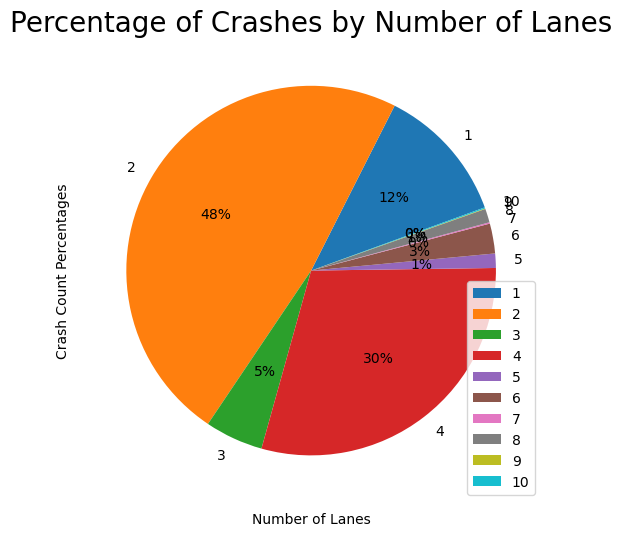

<Figure size 640x480 with 0 Axes>

In [531]:
plot = lanes_df.plot.pie(y='Crash Count', labels=lanes_df['Number of Lanes'], autopct='%1.0f%%', figsize=(6,6), startangle=20)
plot.set_title('Percentage of Crashes by Number of Lanes', fontsize=20)
plot.set_xlabel('Number of Lanes')
plot.set_ylabel('Crash Count Percentages')
plot.legend(loc='lower right')
plt.show()
plt.savefig("pie.svg")

In [485]:
lanes_df['Crash Count'].describe()

count        10.000000
mean      36683.100000
std       59409.212249
min         169.000000
25%        1423.750000
50%        7096.000000
75%       37638.500000
max      176217.000000
Name: Crash Count, dtype: float64

In [533]:
# Reduce table to only what we need for graphing
percentage_injuries_by_lanes_df = lanes_df[['Number of Lanes', 'Fatal Injury Percentage', 'Severe Injury Percentage', 'Minor Injury Percentage', 'Total Injury Percentage']]
percentage_injuries_by_lanes_df

,Number of Lanes,Fatal Injury Percentage,Severe Injury Percentage,Minor Injury Percentage,Total Injury Percentage
0,1,0.079623,0.652911,3.278204,5.946721
1,2,0.042561,0.880165,5.214026,9.291385
2,3,0.058877,1.006262,5.486271,9.714714
3,4,0.038738,0.975835,5.790445,10.269323
4,5,0.043459,1.412429,5.041286,9.495871
5,6,0.062565,1.188738,7.038582,11.147028
6,7,0.000000,0.938967,5.868545,8.685446
7,8,0.000000,1.381028,5.433552,10.935024
8,9,0.000000,2.366864,1.183432,8.284024
9,10,0.000000,2.000000,8.571429,13.142857


In [486]:
# Reduce table to only what we need for this graph
crashes_by_lanes_df = lanes_df[['Number of Lanes', 'No Injuries Recorded', 'Minor Injuries', 'Severe Injuries', 'Fatal Injuries']]
crashes_by_lanes_df

,Number of Lanes,No Injuries Recorded,Minor Injuries,Severe Injuries,Fatal Injuries
0,1.0,41343.0,1441.0,287.0,35.0
1,2.0,159844.0,9188.0,1551.0,75.0
2,3.0,16868.0,1025.0,188.0,11.0
3,4.0,97286.0,6278.0,1058.0,42.0
4,5.0,4165.0,232.0,65.0,2.0
5,6.0,8521.0,675.0,114.0,6.0
6,7.0,389.0,25.0,4.0,0.0
7,8.0,3934.0,240.0,61.0,0.0
8,9.0,155.0,2.0,4.0,0.0
9,10.0,304.0,30.0,7.0,0.0


(0.0, 175000.0)

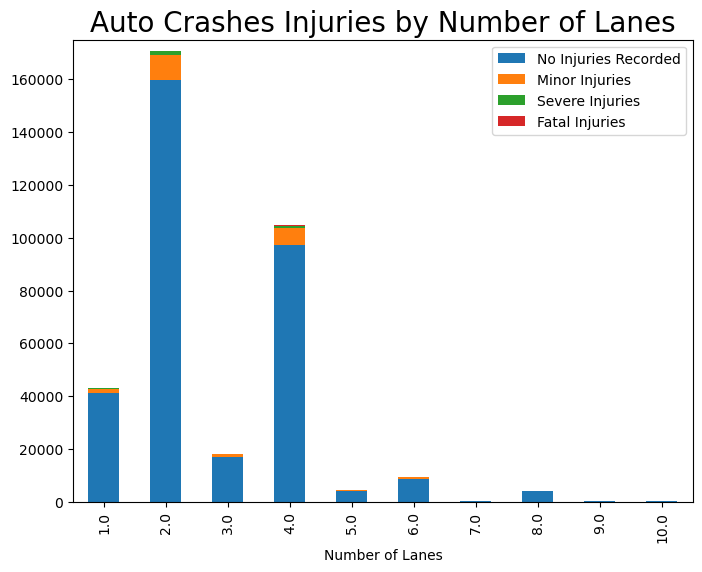

In [487]:
ax = crashes_by_lanes_df.plot.bar(x='Number of Lanes', stacked=True, figsize=(8,6))
ax.set_title("Auto Crashes Injuries by Number of Lanes", fontsize=20)
ax.set_ylim(0,175000)

In [488]:
# Reduce table to only what we need for this graph
injury_severity_by_lanes_df = lanes_df[['Number of Lanes', 'Minor Injuries', 'Severe Injuries', 'Fatal Injuries']]
injury_severity_by_lanes_df

,Number of Lanes,Minor Injuries,Severe Injuries,Fatal Injuries
0,1.0,1441.0,287.0,35.0
1,2.0,9188.0,1551.0,75.0
2,3.0,1025.0,188.0,11.0
3,4.0,6278.0,1058.0,42.0
4,5.0,232.0,65.0,2.0
5,6.0,675.0,114.0,6.0
6,7.0,25.0,4.0,0.0
7,8.0,240.0,61.0,0.0
8,9.0,2.0,4.0,0.0
9,10.0,30.0,7.0,0.0


(0.0, 11500.0)

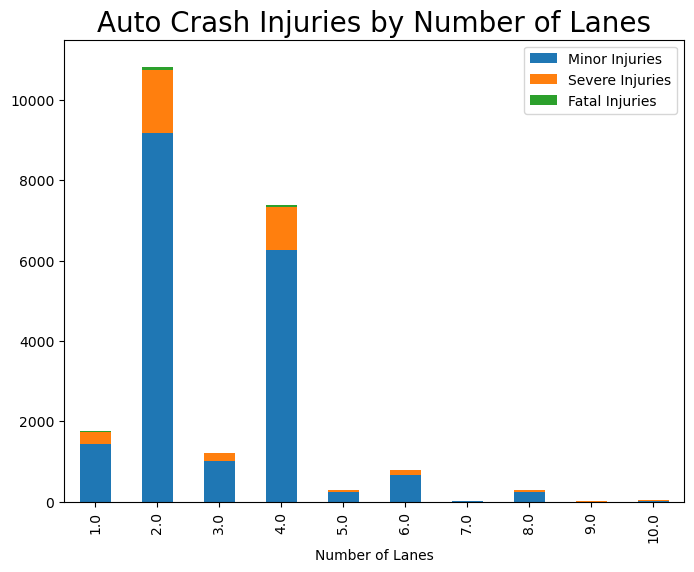

In [489]:
ax = injury_severity_by_lanes_df.plot.bar(x='Number of Lanes', stacked=True, figsize=(8,6))
ax.set_title("Auto Crash Injuries by Number of Lanes", fontsize=20)
ax.set_ylim(0,11500)

In [557]:
# Reduce table to only what we need for graphing
percentage_injuries_by_lanes_df = lanes_df[['Number of Lanes', 'Fatal Injury Percentage', 'Severe Injury Percentage', 'Minor Injury Percentage', 'Total Injury Percentage']]
percentage_injuries_by_lanes_df.set_index(percentage_injuries_by_lanes_df['Number of Lanes'], drop=True, inplace=True)
percentage_injuries_by_lanes_df

,Number of Lanes,Fatal Injury Percentage,Severe Injury Percentage,Minor Injury Percentage,Total Injury Percentage
Number of Lanes,,,,,
1,1,0.079623,0.652911,3.278204,5.946721
2,2,0.042561,0.880165,5.214026,9.291385
3,3,0.058877,1.006262,5.486271,9.714714
4,4,0.038738,0.975835,5.790445,10.269323
5,5,0.043459,1.412429,5.041286,9.495871
6,6,0.062565,1.188738,7.038582,11.147028
7,7,0.000000,0.938967,5.868545,8.685446
8,8,0.000000,1.381028,5.433552,10.935024
9,9,0.000000,2.366864,1.183432,8.284024


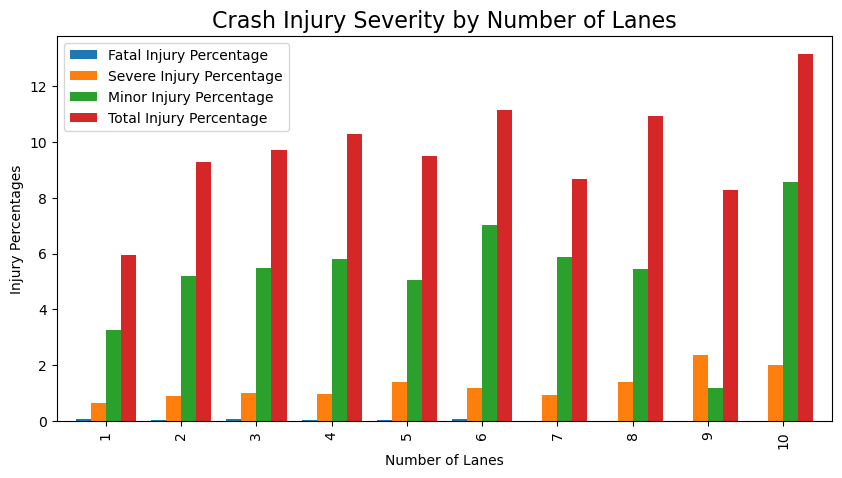

<Figure size 640x480 with 0 Axes>

In [568]:
# percentage_injuries_by_lanes_df['Severe Injury Percentage'].plot(kind='bar')
plot = percentage_injuries_by_lanes_df.iloc[:, 1:].plot(kind='bar', figsize=(10,5), width=.8)
plot.set_title('Crash Injury Severity by Number of Lanes', fontsize=16)
plot.set_xlabel('Number of Lanes')
plot.set_ylabel('Injury Percentages')
# plot.legend(loc='lower right')
plt.show()
plt.savefig("percentage_bar.svg")

# plt.scatter(lanes_df.index,lanes_df["Severe Injury Rate"])


In [561]:
# Reduce table to only what we need for graphing
percentage_fatalities_by_lanes_df = lanes_df[['Number of Lanes', 'Fatal Injury Percentage', 'Severe Injury Percentage']]
percentage_fatalities_by_lanes_df.set_index(percentage_injuries_by_lanes_df['Number of Lanes'], drop=True, inplace=True)
percentage_fatalities_by_lanes_df

,Number of Lanes,Fatal Injury Percentage,Severe Injury Percentage
Number of Lanes,,,
1,1,0.079623,0.652911
2,2,0.042561,0.880165
3,3,0.058877,1.006262
4,4,0.038738,0.975835
5,5,0.043459,1.412429
6,6,0.062565,1.188738
7,7,0.000000,0.938967
8,8,0.000000,1.381028
9,9,0.000000,2.366864


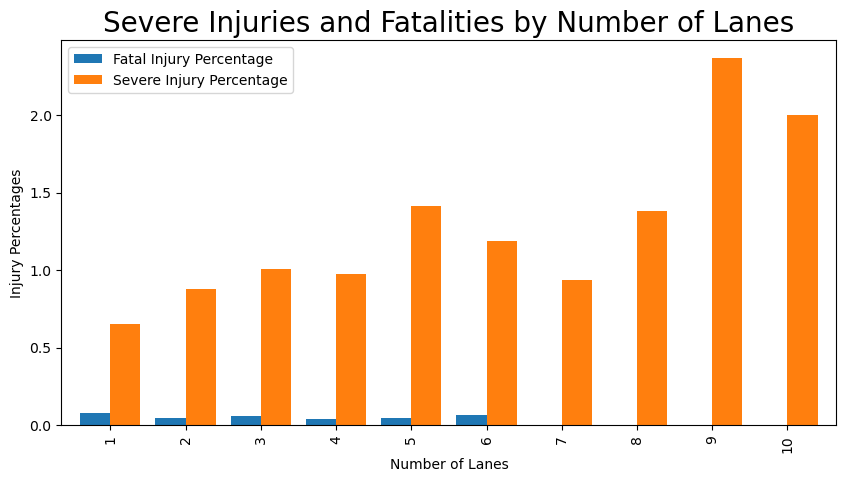

<Figure size 640x480 with 0 Axes>

In [570]:
plot = percentage_fatalities_by_lanes_df.iloc[:, 1:].plot(kind='bar', figsize=(10,5), width=.8)
plot.set_title('Severe Injuries and Fatalities by Number of Lanes', fontsize=20)
plot.set_xlabel('Number of Lanes')
plot.set_ylabel('Injury Percentages')
# plot.legend(loc='lower right')
plt.show()
plt.savefig("percentage_fatalities_bar.svg")

In [571]:
# plt.figure(figsize=(8,5))
# percentage_injuries_by_lanes_df['Fatal Injury Percentage'].plot(kind='bar')
# plt.scatter(lanes_df.index,lanes_df["Severe Injury Rate"])
# plt.show()

In [572]:
# plt.figure(figsize=(8,5))
# plt.scatter(lanes_df.index,lanes_df["Severe Injury Rate"])
# plt.show()

In [573]:
# plt.figure(figsize=(8,5))
# lanes_df['Fatal Injury Rate'].plot(kind='bar')
# plt.show()

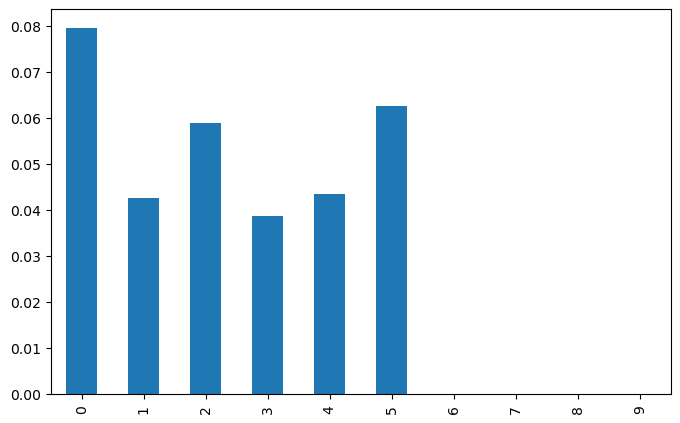

In [574]:
plt.figure(figsize=(8,5))
lanes_df['Fatal Injury Percentage'].plot(kind='bar')
plt.show()

In [575]:
# Change 'Number of Lanes' to a float, so we can filter numerically
# data_df['Number of Lanes'] = data_df['Number of Lanes'].astype(float)

data_df['Posted Speed Limit'].value_counts().nlargest(50)


30    116777
35     10968
25      9338
20      5575
15      3536
40      1800
0       1774
10      1158
45      1098
5        688
55       124
3         35
9         22
50        22
39         8
24         5
2          5
60         4
1          3
14         2
32         2
65         1
70         1
Name: Posted Speed Limit, dtype: int64

In [576]:
# Drop bad data (i.e. roads with imposible numbers of lanes)
speedlimit_df = data_df.loc[(data_df['Posted Speed Limit'] >= 10) & (data_df['Number of Lanes'] != 39)]

In [577]:
speedlimit_df['Posted Speed Limit'].value_counts()

30    116777
35     10968
25      9338
20      5575
15      3536
40      1800
10      1158
45      1098
55       124
50        22
39         8
24         5
60         4
14         2
32         2
65         1
70         1
Name: Posted Speed Limit, dtype: int64

In [365]:
# Sanity Check
# speedlimit_df[(speedlimit_df['Posted Speed Limit'] == 10) & (speedlimit_df['Street Type'] != "PARKING LOT") & (speedlimit_df['Street Type'] != "ALLEY")] 

In [579]:
# Cleanup some badly recorded data.  (Probably needs deeper investigation to make 100% correct):
speedlimit_df.loc[speedlimit_df["Posted Speed Limit"] == 14, "Posted Speed Limit"] = 10
speedlimit_df.loc[speedlimit_df["Posted Speed Limit"] == 24, "Posted Speed Limit"] = 30
speedlimit_df.loc[speedlimit_df["Posted Speed Limit"] == 32, "Posted Speed Limit"] = 30
speedlimit_df.loc[speedlimit_df["Posted Speed Limit"] == 39, "Posted Speed Limit"] = 35
speedlimit_df['Posted Speed Limit'].value_counts()

30    116784
35     10976
25      9338
20      5575
15      3536
40      1800
10      1160
45      1098
55       124
50        22
60         4
65         1
70         1
Name: Posted Speed Limit, dtype: int64

In [580]:
# Group by injury sums of each posted speed limit:
speed_df_groupby_speedlimit = speedlimit_df.groupby("Posted Speed Limit").sum()

In [581]:
speed_df_groupby_speedlimit[['No Injuries Recorded', 'Total Injuries', 'Minor Injuries', 'Severe Injuries', 'Fatal Injuries']]

,No Injuries Recorded,Total Injuries,Minor Injuries,Severe Injuries,Fatal Injuries
Posted Speed Limit,,,,,
10,2097.0,75.0,16.0,8.0,0.0
15,6431.0,245.0,120.0,27.0,3.0
20,10207.0,737.0,411.0,75.0,2.0
25,17904.0,1420.0,840.0,124.0,10.0
30,258596.0,27062.0,15324.0,2580.0,145.0
35,24629.0,3284.0,1881.0,351.0,6.0
40,4678.0,577.0,239.0,111.0,1.0
45,2784.0,317.0,143.0,40.0,1.0
50,41.0,4.0,2.0,0.0,0.0


In [584]:
# Change basic counts into percentages
speed_df_groupby_speedlimit['Crash Count'] = speed_df_groupby_speedlimit['No Injuries Recorded'] + speed_df_groupby_speedlimit['Total Injuries']
speed_df_groupby_speedlimit['Fatal Injury Percent'] = speed_df_groupby_speedlimit['Fatal Injuries'] / speed_df_groupby_speedlimit['Crash Count'] * 100
speed_df_groupby_speedlimit['Severe Injury Percent'] = speed_df_groupby_speedlimit['Severe Injuries'] / speed_df_groupby_speedlimit['Crash Count'] * 100

speed_df_groupby_speedlimit[['No Injuries Recorded', 'Total Injuries', 'Minor Injuries', 'Severe Injuries', 'Severe Injury Rate', 'Fatal Injuries', 'Fatal Injury Rate']]

# Convert dataframe groupby object to dataframe:
speed_df = speed_df_groupby_speedlimit.reset_index()
# speed_df = speed_df[['Posted Speed Limit', 'Total Injuries', 'Fatal Injuries', 'Severe Injuries', 'Minor Injuries', 'No Injuries Recorded', 'Crash Count', 'Fatal Injury Rate', 'Severe Injury Rate']]
speed_df = speed_df[['Posted Speed Limit', 'Fatal Injury Percent', 'Severe Injury Percent']]


speed_df

,Posted Speed Limit,Fatal Injury Percent,Severe Injury Percent
0,10,0.000000,0.368324
1,15,0.044937,0.404434
2,20,0.018275,0.685307
3,25,0.051749,0.641689
4,30,0.050760,0.903178
5,35,0.021495,1.257479
6,40,0.019029,2.112274
7,45,0.032248,1.289906
8,50,0.000000,0.000000
9,55,0.000000,0.800000


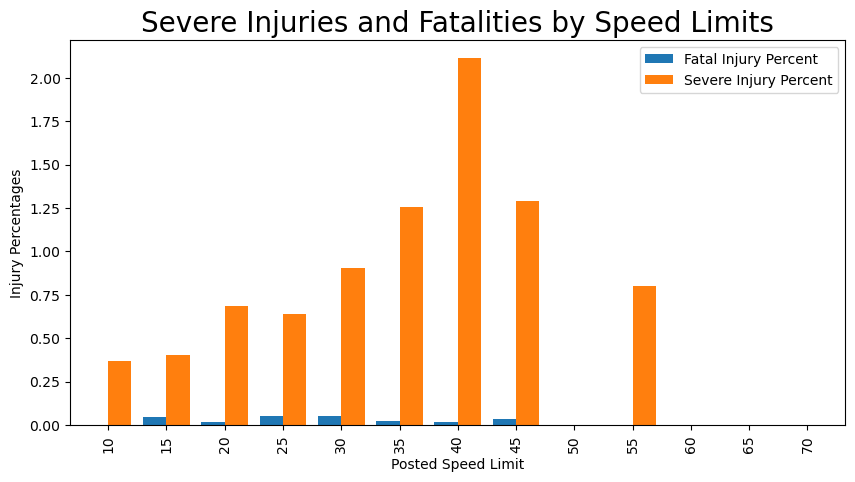

<Figure size 640x480 with 0 Axes>

In [588]:
plot = speed_df.plot(kind="bar", x="Posted Speed Limit", figsize=(10,5), width=.8)
plot.set_title('Severe Injuries and Fatalities by Speed Limits', fontsize=20)
plot.set_xlabel('Posted Speed Limit')
plot.set_ylabel('Injury Percentages')
plt.show()
plt.savefig("percentage_fatalities_by_speed_bar.svg")

In [589]:
speed_fatalities_df = speed_df[['Posted Speed Limit', 'Fatal Injury Percent']]
speed_fatalities_df

,Posted Speed Limit,Fatal Injury Percent
0,10,0.000000
1,15,0.044937
2,20,0.018275
3,25,0.051749
4,30,0.050760
5,35,0.021495
6,40,0.019029
7,45,0.032248
8,50,0.000000
9,55,0.000000


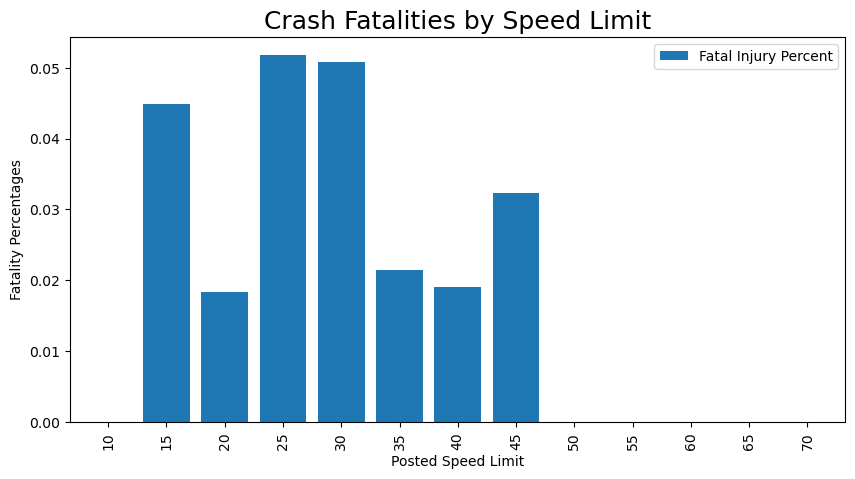

<Figure size 640x480 with 0 Axes>

In [613]:
plot = speed_fatalities_df.plot(kind="bar", x="Posted Speed Limit", figsize=(10,5), width=.8)
plot.set_title('Crash Fatalities by Speed Limit', fontsize=18)
plot.set_xlabel('Posted Speed Limit')
plot.set_ylabel('Fatality Percentages')
plt.show()
plt.savefig("percentage_fatalities_by_speed_bar.svg")

In [599]:
data_df_groupby_year

,Posted Speed Limit,Number of Lanes,Street Number,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Latitude,Longitude,Number of Passengers,Number of Occupants,Zip Code,Population,Population/Sq Miles,Sq Miles
Year,,,,,,,,,,,,,,,,
2018,5790676,319427.0,737646934,40227.0,209.0,4080.0,22217.0,438005.0,8.520706e+06,-1.784606e+07,50610.0,223989.0,1.233976e+10,1.178601e+10,3.229239e+09,951357.03
2019,5724120,83748.0,724927426,40229.0,143.0,3925.0,22333.0,430759.0,8.370279e+06,-1.753133e+07,51089.0,220961.0,1.212213e+10,1.155196e+10,3.139089e+09,941338.43
2020,4551484,55.0,614648051,35886.0,214.0,3773.0,20681.0,325605.0,6.632248e+06,-1.389545e+07,37264.0,167676.0,9.608365e+09,9.406356e+09,2.305553e+09,804372.80
2021,5335284,95.0,713875863,41145.0,243.0,3893.0,23993.0,382376.0,7.782284e+06,-1.630397e+07,42724.0,196004.0,1.127376e+10,1.101844e+10,2.762857e+09,930642.40
2022,5289146,86.0,692728110,40052.0,256.0,3719.0,22825.0,379124.0,7.703557e+06,-1.613703e+07,40963.0,195198.0,1.115814e+10,1.085650e+10,2.808814e+09,905331.72


In [626]:
fatality_stats = {
    'Year': [2018, 2019, 2020, 2021],
    'Chicago Population': [2705994, 2693976, 2746388, 2696569],
    'Chicago Auto Fatalities': [209, 143, 214, 243],
    'US Population': [332140037, 334319671, 335942003, 336997624],
    'US Auto Fatalities': [36835, 36355, 38824, 42915]} 

In [629]:
fatality_stats_df = pd.DataFrame(fatality_stats, columns = ['Year', 'Chicago Population', 'Chicago Auto Fatalities', 'US Population', 'US Auto Fatalities'])
fatality_stats_df

,Year,Chicago Population,Chicago Auto Fatalities,US Population,US Auto Fatalities
0,2018,2705994,209,332140037,36835
1,2019,2693976,143,334319671,36355
2,2020,2746388,214,335942003,38824
3,2021,2696569,243,336997624,42915


In [636]:
fatality_stats_df['Chicago Auto Fatalities Per 100,000'] = fatality_stats_df['Chicago Auto Fatalities'] / fatality_stats_df['Chicago Population'] * 100000
fatality_stats_df['US Auto Fatalities Per 100,000'] = fatality_stats_df['US Auto Fatalities'] / fatality_stats_df['US Population'] * 100000
fatality_stats_df['Chicago Fatalities Rate vs. US'] = fatality_stats_df['Chicago Auto Fatalities Per 100,000'] / fatality_stats_df['US Auto Fatalities Per 100,000']
fatality_stats_df['Chicago Percentage Safer vs. US'] = 100 - ((fatality_stats_df['Chicago Auto Fatalities Per 100,000'] / fatality_stats_df['US Auto Fatalities Per 100,000'] ) * 100)
fatality_stats_df


,Year,Chicago Population,Chicago Auto Fatalities,US Population,US Auto Fatalities,"Chicago Auto Fatalities Per 100,000","US Auto Fatalities Per 100,000",Chicago Fatalities Rate vs. US,Chicago Percentage Safer vs. US
0,2018,2705994,209,332140037,36835,7.723594,11.090202,0.696434,30.356592
1,2019,2693976,143,334319671,36355,5.308139,10.874323,0.488135,51.186483
2,2020,2746388,214,335942003,38824,7.792053,11.556757,0.674242,32.575783
3,2021,2696569,243,336997624,42915,9.011451,12.734511,0.707640,29.235986


In [631]:
fatality_comparison_df = fatality_stats_df[['Year', 'Chicago Auto Fatalities Per 100,000', 'US Auto Fatalities Per 100,000']]
fatality_comparison_df

,Year,"Chicago Auto Fatalities Per 100,000","US Auto Fatalities Per 100,000"
0,2018,7.723594,11.090202
1,2019,5.308139,10.874323
2,2020,7.792053,11.556757
3,2021,9.011451,12.734511


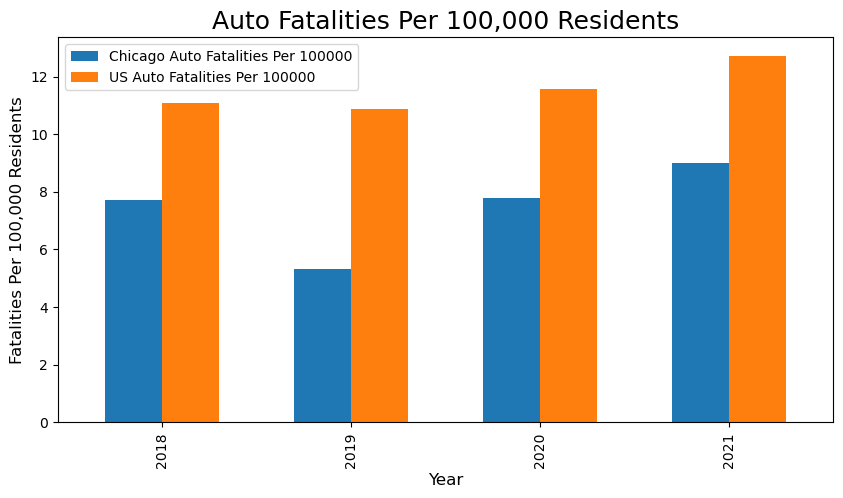

In [625]:
plot = fatality_comparison_df.plot(kind="bar", x="Year", figsize=(10,5), width=.6)
plot.set_title('Auto Fatalities Per 100,000 Residents', fontsize=18)
plot.set_xlabel('Year', fontsize=12)
plot.set_ylabel('Fatalities Per 100,000 Residents', fontsize=12)
plt.show()